# 数据可视化作业题目

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [65]:
data = pd.DataFrame(sns.load_dataset("flights"))
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [70]:
pass_year = data.groupby(['year'],as_index=False,observed=True)[['passengers']].agg('sum')
pass_month = data.groupby(['month'],as_index=False,observed=True)[['passengers']].agg('sum')
pass_month.head()


,month,passengers
0,Jan,2901
1,Feb,2820
2,Mar,3242
3,Apr,3205
4,May,3262


Text(0, 0.5, 'number')

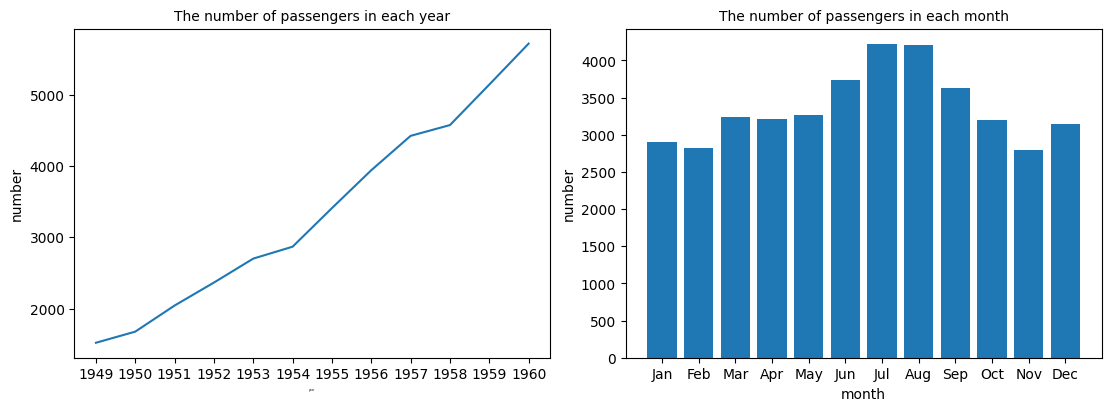

In [81]:
fig,[axes1, axes2]=plt.subplots(1,2,figsize=(11,4),layout='constrained')
axes1.plot(pass_year[['year']],pass_year[['passengers']])
axes1.set_title('The number of passengers in each year',fontsize=10)
axes1.set_xlabel('year',fontsize=2)
axes1.set_ylabel('number',fontsize=10)
axes1.set_xticks(np.arange(1949,1961))

axes2.bar(np.arange(1,13),pass_month['passengers'])
axes2.set_title('The number of passengers in each month',fontsize=10)
axes2.set_xlabel('month',fontsize=10)
axes2.set_xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axes2.set_ylabel('number',fontsize=10)


## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [136]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 'Sepal_width vs. Petal_width')

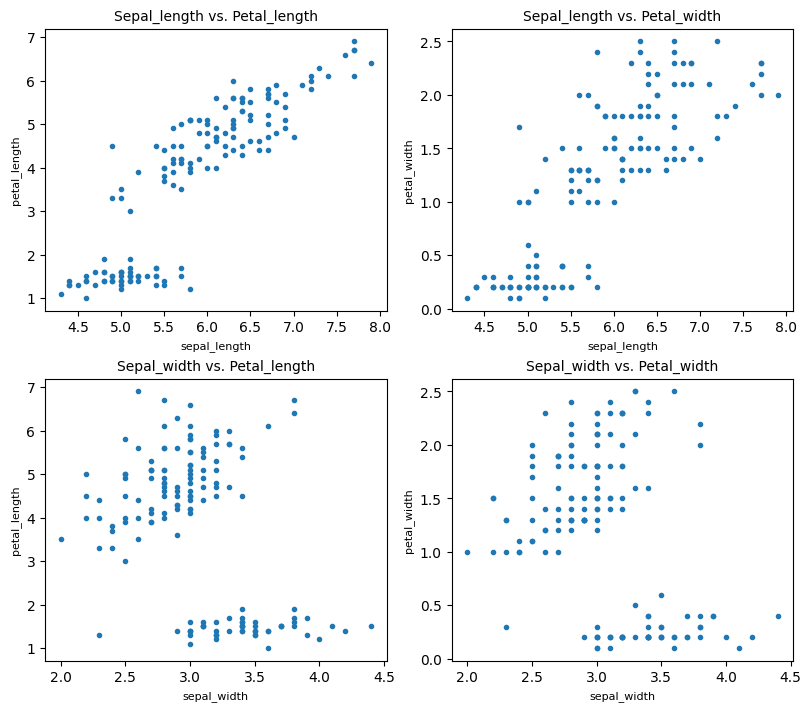

In [100]:
fig,[[axes1,axes2],[axes3,axes4]]=plt.subplots(2,2,layout='constrained',figsize=[8,7])
axes1.plot(data['sepal_length'],data['petal_length'],'o',markersize=3)
axes1.set_xlabel('sepal_length',fontsize=8)
axes1.set_ylabel('petal_length',fontsize=8)
axes1.set_title('Sepal_length vs. Petal_length',fontsize=10)

axes2.plot(data['sepal_length'],data['petal_width'],'o',markersize=3)
axes2.set_xlabel('sepal_length',fontsize=8)
axes2.set_ylabel('petal_width',fontsize=8)
axes2.set_title('Sepal_length vs. Petal_width',fontsize=10)

axes3.plot(data['sepal_width'],data['petal_length'],'o',markersize=3)
axes3.set_xlabel('sepal_width',fontsize=8)
axes3.set_ylabel('petal_length',fontsize=8)
axes3.set_title('Sepal_width vs. Petal_length',fontsize=10)

axes4.plot(data['sepal_width'],data['petal_width'],'o',markersize=3)
axes4.set_xlabel('sepal_width',fontsize=8)
axes4.set_ylabel('petal_width',fontsize=8)
axes4.set_title('Sepal_width vs. Petal_width',fontsize=10)



Text(0.5, 1.0, 'Sepal_width vs. Petal_width')

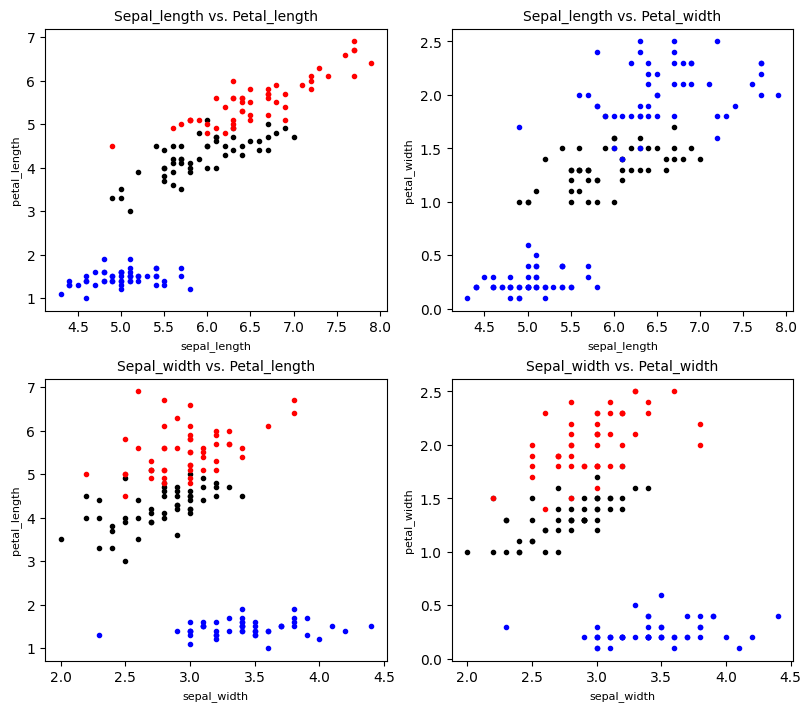

In [139]:
data1=data.copy(deep=True)
for x in data1.index:
    if data1.loc[x,'species'] != 'setosa' :
        data1.drop(x,inplace=True)

data2=data.copy(deep=True)
for x in data2.index:
    if data2.loc[x,'species'] != 'versicolor' :
        data2.drop(x,inplace=True)

data3=data.copy(deep=True)   
for x in data3.index:
    if data3.loc[x,'species'] != 'virginica' :
        data3.drop(x,inplace=True)

fig,[[axes1,axes2],[axes3,axes4]]=plt.subplots(2,2,layout='constrained',figsize=[8,7])
axes1.plot(data1['sepal_length'],data1['petal_length'],'bo',markersize=3)
axes1.plot(data2['sepal_length'],data2['petal_length'],'ko',markersize=3)
axes1.plot(data3['sepal_length'],data3['petal_length'],'ro',markersize=3)
axes1.set_xlabel('sepal_length',fontsize=8)
axes1.set_ylabel('petal_length',fontsize=8)
axes1.set_title('Sepal_length vs. Petal_length',fontsize=10)

axes2.plot(data1['sepal_length'],data1['petal_width'],'bo',markersize=3)
axes2.plot(data2['sepal_length'],data2['petal_width'],'ko',markersize=3)
axes2.plot(data3['sepal_length'],data3['petal_width'],'bo',markersize=3)
axes2.set_xlabel('sepal_length',fontsize=8)
axes2.set_ylabel('petal_width',fontsize=8)
axes2.set_title('Sepal_length vs. Petal_width',fontsize=10)

axes3.plot(data1['sepal_width'],data1['petal_length'],'bo',markersize=3)
axes3.plot(data2['sepal_width'],data2['petal_length'],'ko',markersize=3)
axes3.plot(data3['sepal_width'],data3['petal_length'],'ro',markersize=3)
axes3.set_xlabel('sepal_width',fontsize=8)
axes3.set_ylabel('petal_length',fontsize=8)
axes3.set_title('Sepal_width vs. Petal_length',fontsize=10)

axes4.plot(data1['sepal_width'],data1['petal_width'],'bo',markersize=3)
axes4.plot(data2['sepal_width'],data2['petal_width'],'ko',markersize=3)
axes4.plot(data3['sepal_width'],data3['petal_width'],'ro',markersize=3)
axes4.set_xlabel('sepal_width',fontsize=8)
axes4.set_ylabel('petal_width',fontsize=8)
axes4.set_title('Sepal_width vs. Petal_width',fontsize=10)

        


Text(0.5, 1.0, 'The box with four features for virginica flowers')

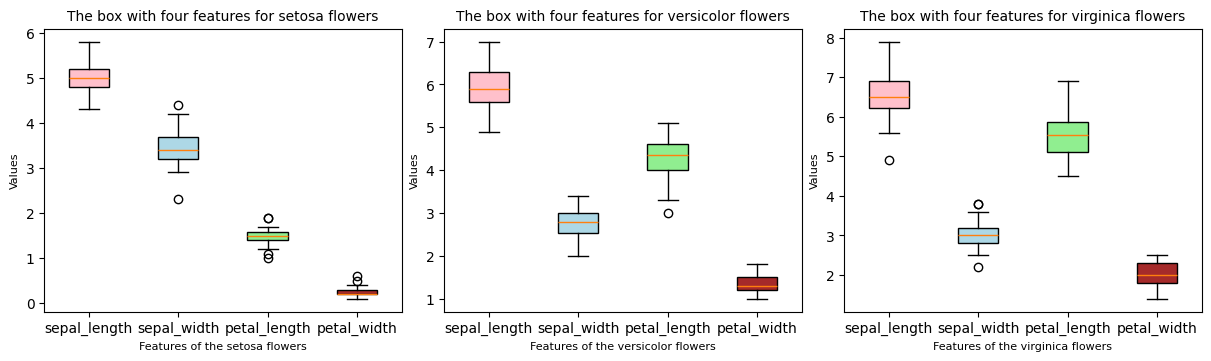

In [160]:
fig,[axes1,axes2,axes3]=plt.subplots(1,3,layout='constrained',figsize=[12,3.5])
bplot1=axes1.boxplot([data1['sepal_length'],data1['sepal_width'],data1['petal_length'],data1['petal_width']],labels=['sepal_length','sepal_width','petal_length','petal_width'],
              patch_artist=True)
colors = ['pink', 'lightblue', 'lightgreen','brown']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
axes1.set_xlabel('Features of the setosa flowers',fontsize=8)
axes1.set_ylabel('Values',fontsize=8)
axes1.set_title('The box with four features for setosa flowers',fontsize=10)

bplot1=axes2.boxplot([data2['sepal_length'],data2['sepal_width'],data2['petal_length'],data2['petal_width']],labels=['sepal_length','sepal_width','petal_length','petal_width'],
              patch_artist=True)
colors = ['pink', 'lightblue', 'lightgreen','brown']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
axes2.set_xlabel('Features of the versicolor flowers',fontsize=8)
axes2.set_ylabel('Values',fontsize=8)
axes2.set_title('The box with four features for versicolor flowers',fontsize=10)

bplot1=axes3.boxplot([data3['sepal_length'],data3['sepal_width'],data3['petal_length'],data3['petal_width']],labels=['sepal_length','sepal_width','petal_length','petal_width'],
              patch_artist=True)
colors = ['pink', 'lightblue', 'lightgreen','brown']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
axes3.set_xlabel('Features of the virginica flowers',fontsize=8)
axes3.set_ylabel('Values',fontsize=8)
axes3.set_title('The box with four features for virginica flowers',fontsize=10)



## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [161]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


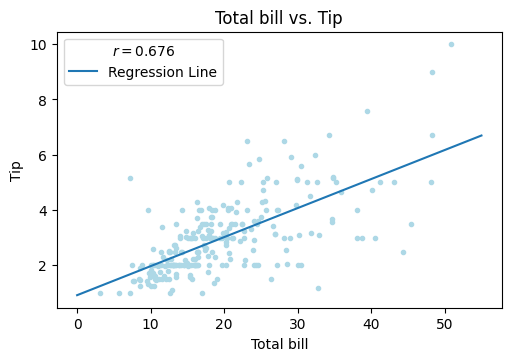

In [180]:
from scipy import stats

x=np.arange(0,56)
k,b,r,p,st=stats.linregress(data['total_bill'],data['tip'])
def myfun(x):
    return k*x+b
reg=np.frompyfunc(myfun,1,1)

fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
axe.plot(data['total_bill'],data['tip'],marker='o',color='lightblue',linestyle='',markersize=3)
line0=axe.plot(x,reg(x))
axe.set_xlabel('Total bill')
axe.set_ylabel('Tip')
axe.set_title('Total bill vs. Tip')
axe.legend(line0,['Regression Line'],title=r'$r=0.676$')

RangeIndex(start=0, stop=244, step=1)


Text(0.5, 1.0, 'The box with 2 features of the tip')

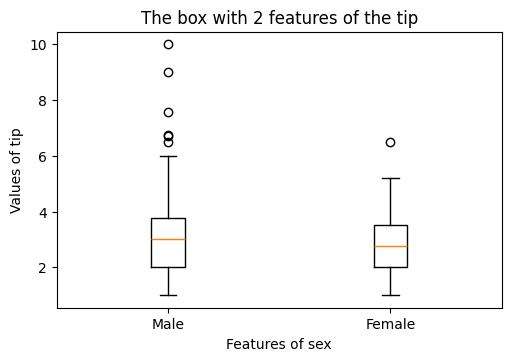

In [183]:
data1=data.copy(deep=True)
for x in data1.index :
    if data1.loc[x,'sex'] != 'Male' :
        data1.drop(x,inplace=True)

data2=data.copy(deep=True)
for x in data2.index :
    if data2.loc[x,'sex'] != 'Female' :
        data2.drop(x,inplace=True)
        
fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
axe.boxplot([data1['tip'],data2['tip']],labels=['Male','Female'])
axe.set_xlabel('Features of sex')
axe.set_ylabel('Values of tip')
axe.set_title('The box with 2 features of the tip')

Text(0.5, 1.0, 'The box with 2 features of the tip')

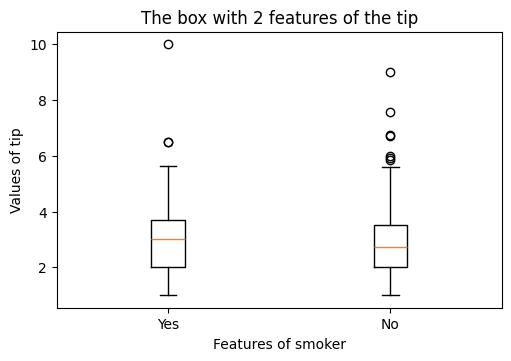

In [184]:
data1=data.copy(deep=True)
for x in data1.index :
    if data1.loc[x,'smoker'] != 'Yes' :
        data1.drop(x,inplace=True)

data2=data.copy(deep=True)
for x in data2.index :
    if data2.loc[x,'smoker'] != 'No' :
        data2.drop(x,inplace=True)
        
fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
axe.boxplot([data1['tip'],data2['tip']],labels=['Yes','No'])
axe.set_xlabel('Features of smoker')
axe.set_ylabel('Values of tip')
axe.set_title('The box with 2 features of the tip')

Text(0.5, 1.0, 'The box with 4 features of the tip')

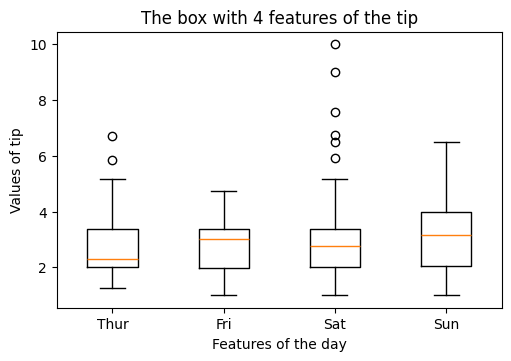

In [185]:
data1=data.copy(deep=True)
for x in data1.index :
    if data1.loc[x,'day'] != 'Thur' :
        data1.drop(x,inplace=True)

data2=data.copy(deep=True)
for x in data2.index :
    if data2.loc[x,'day'] != 'Fri' :
        data2.drop(x,inplace=True)

data3=data.copy(deep=True)
for x in data3.index :
    if data3.loc[x,'day'] != 'Sat' :
        data3.drop(x,inplace=True)

data4=data.copy(deep=True)
for x in data4.index :
    if data4.loc[x,'day'] != 'Sun' :
        data4.drop(x,inplace=True)
        
fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
axe.boxplot([data1['tip'],data2['tip'],data3['tip'],data4['tip']],labels=['Thur','Fri','Sat','Sun'])
axe.set_xlabel('Features of the day')
axe.set_ylabel('Values of tip')
axe.set_title('The box with 4 features of the tip')

Text(0.5, 1.0, 'The box with 2 features of the tip')

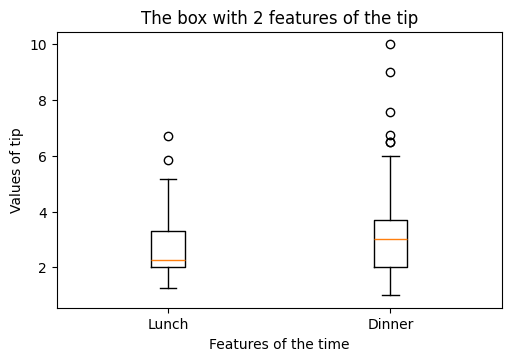

In [186]:
data1=data.copy(deep=True)
for x in data1.index :
    if data1.loc[x,'time'] != 'Lunch' :
        data1.drop(x,inplace=True)

data2=data.copy(deep=True)
for x in data2.index :
    if data2.loc[x,'time'] != 'Dinner' :
        data2.drop(x,inplace=True)
        
fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
axe.boxplot([data1['tip'],data2['tip']],labels=['Lunch','Dinner'])
axe.set_xlabel('Features of the time')
axe.set_ylabel('Values of tip')
axe.set_title('The box with 2 features of the tip')

Text(0.5, 1.0, 'The box with 4 features of the tip')

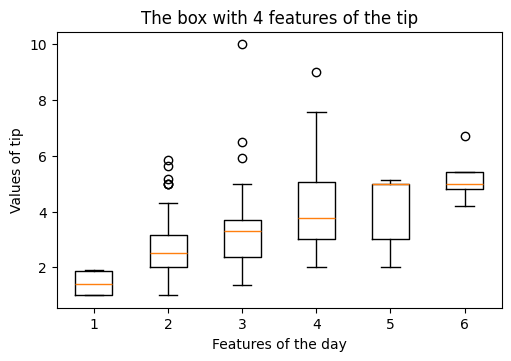

In [193]:
data1=data.copy(deep=True)
for x in data1.index :
    if data1.loc[x,'size'] != 1 :
        data1.drop(x,inplace=True)

data2=data.copy(deep=True)
for x in data2.index :
    if data2.loc[x,'size'] != 2 :
        data2.drop(x,inplace=True)

data3=data.copy(deep=True)
for x in data3.index :
    if data3.loc[x,'size'] != 3 :
        data3.drop(x,inplace=True)

data4=data.copy(deep=True)
for x in data4.index :
    if data4.loc[x,'size'] != 4 :
        data4.drop(x,inplace=True)
        
data5=data.copy(deep=True)
for x in data5.index :
    if data5.loc[x,'size'] != 5 :
        data5.drop(x,inplace=True)

data6=data.copy(deep=True)
for x in data6.index :
    if data6.loc[x,'size'] != 6 :
        data6.drop(x,inplace=True)
        
fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
axe.boxplot([data1['tip'],data2['tip'],data3['tip'],data4['tip'],data5['tip'],data6['tip']])
axe.set_xlabel('Features of the day')
axe.set_ylabel('Values of tip')
axe.set_title('The box with 4 features of the tip')

In [204]:
tem=data.groupby(['smoker','sex'],observed=True)['tip'].agg('mean').unstack('smoker')
tem.head()

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


Text(0.5, 1.0, 'Values by Sex (Male of Female) and Smoker (Yes of No)')

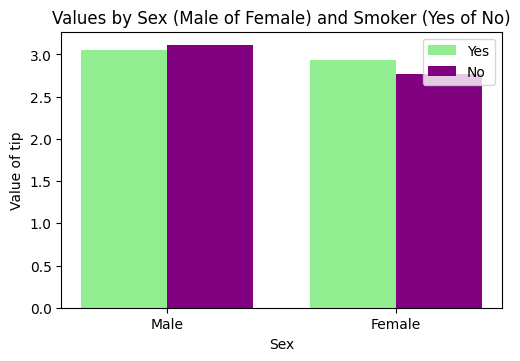

In [233]:
fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
bar1=axe.bar([0,0.8],tem.loc[:,'Yes'],color='lightgreen',width=0.3)
bar2=axe.bar([0.3,1.1],tem.loc[:,'No'],color='purple',width=0.3)
axe.set_xticks([0.15,0.95],['Male','Female'])
axe.legend([bar1,bar2],['Yes','No'])
axe.set_xlabel('Sex')
axe.set_ylabel('Value of tip')
axe.set_title('Values by Sex (Male of Female) and Smoker (Yes of No)')




## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [279]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


        survived  unsurvived  survived_prop  unsurvived_prop
pclass                                                      
1            136          80       0.629630         0.370370
2             87          97       0.472826         0.527174
3            119         372       0.242363         0.757637


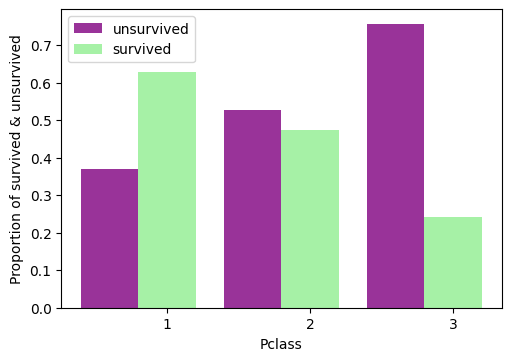

In [262]:
data['unsurvived']=(-data['survived']+1)
tem=(data.groupby(['pclass'])[['survived','unsurvived']].agg('sum'))
tem['survived_prop']=tem['survived']/(tem['survived']+tem['unsurvived'])
tem['unsurvived_prop']=tem['unsurvived']/(tem['survived']+tem['unsurvived'])
print(tem)

fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
bar1=axe.bar([1,2,3],tem.loc[:,'unsurvived_prop'],color='purple',width=0.4,alpha=0.8)
bar2=axe.bar([1.4,2.4,3.4],tem.loc[:,'survived_prop'],color='lightgreen',width=0.4,alpha=0.8)
axe.set_xticks([1.4,2.4,3.4],['1','2','3'])
axe.set_xlabel('Pclass')
axe.set_ylabel('Proportion of survived & unsurvived')
axe.legend([bar1,bar2],['unsurvived','survived'])
axe.set_title('Proportion of survived & unsurvived by Pclass')



        survived  unsurvived  survived_prop  unsurvived_prop
sex                                                         
female       233          81       0.742038         0.257962
male         109         468       0.188908         0.811092


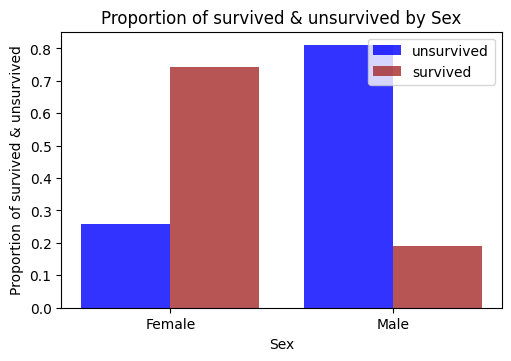

In [271]:
tem=(data.groupby(['sex'])[['survived','unsurvived']].agg('sum'))
tem['survived_prop']=tem['survived']/(tem['survived']+tem['unsurvived'])
tem['unsurvived_prop']=tem['unsurvived']/(tem['survived']+tem['unsurvived'])
print(tem)

fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
bar1=axe.bar([1,2],tem.loc[:,'unsurvived_prop'],color='blue',width=0.4,alpha=0.8)
bar2=axe.bar([1.4,2.4],tem.loc[:,'survived_prop'],color='brown',width=0.4,alpha=0.8)
axe.set_xticks([1.2,2.2],['Female','Male'])
axe.set_title('Proportion of survived & unsurvived by Sex')
axe.set_xlabel('Sex')
axe.set_ylabel('Proportion of survived & unsurvived')
axe.legend([bar1,bar2],['unsurvived','survived'])


Text(0, 0.5, 'Values of fare')

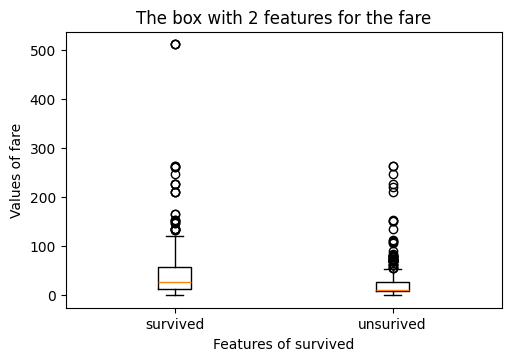

In [273]:
data1=data.copy(deep=True)
for x in data1.index :
    if data1.loc[x,'survived'] != 1 :
        data1.drop(x,inplace=True)
        
data2=data.copy(deep=True)
for x in data1.index :
    if data2.loc[x,'survived'] != 0 :
        data2.drop(x,inplace=True)

fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
axe.boxplot([data1['fare'],data2['fare']],labels=['survived','unsurived'])
axe.set_title('The box with 2 features for the fare')
axe.set_xlabel('Features of survived')
axe.set_ylabel('Values of fare')

Text(0, 0.5, 'Values of age')

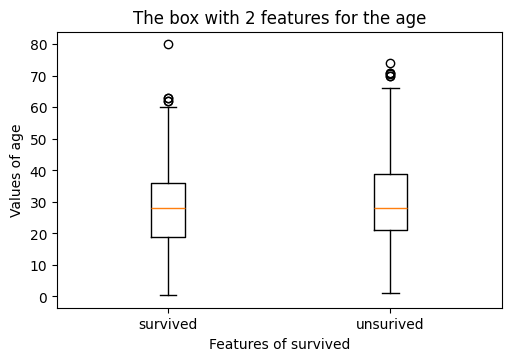

In [281]:
datac=data.dropna(subset='age')
data1=datac.copy(deep=True)
for x in data1.index :
    if data1.loc[x,'survived'] != 1 :
        data1.drop(x,inplace=True)
        
data2=datac.copy(deep=True)
for x in data1.index :
    if data2.loc[x,'survived'] != 0 :
        data2.drop(x,inplace=True)

fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
axe.boxplot([data1['age'],data2['age']],labels=['survived','unsurived'])
axe.set_title('The box with 2 features for the age')
axe.set_xlabel('Features of survived')
axe.set_ylabel('Values of age')

           embarked
pclass             
1      1          C
       3          S
       6          S
       11         S
       23         S
...             ...
3      882        S
       884        S
       885        Q
       888        S
       890        Q

[891 rows x 1 columns]
[0 0 0] [0 0 0] [0 0 1]
[1 0 0] [0 0 0] [0 0 1]
[1 0 0] [0 0 0] [0 0 2]
[1 0 1] [0 0 0] [0 0 2]
[1 0 1] [0 0 0] [0 0 3]
[1 0 1] [0 0 0] [0 1 3]
[1 0 2] [0 0 0] [0 1 3]
[1 0 2] [0 0 0] [0 1 4]
[1 0 2] [0 0 0] [0 1 5]
[1 0 2] [1 0 0] [0 1 5]
[1 0 2] [1 0 0] [0 1 6]
[1 0 3] [1 0 0] [0 1 6]
[1 0 3] [1 0 0] [0 1 7]
[1 0 3] [1 0 0] [0 1 8]
[1 0 3] [1 0 0] [0 1 9]
[1 0 3] [1 0 1] [0 1 9]
[1 0 3] [1 0 1] [0 2 9]
[1 0 3] [1 0 2] [0 2 9]
[1 0 3] [1 0 2] [ 0  2 10]
[1 0 3] [1 0 2] [ 1  2 10]
[1 0 3] [1 0 3] [ 1  2 10]
[1 0 3] [1 0 4] [ 1  2 10]
[1 0 3] [1 0 4] [ 1  3 10]
[1 0 4] [1 0 4] [ 1  3 10]
[1 0 4] [1 0 4] [ 1  3 11]
[1 0 4] [1 0 4] [ 1  3 12]
[1 0 4] [1 0 4] [ 2  3 12]
[1 0 5] [1 0 4] [ 2  3 12]
[1 0 5] [1 0 4

Text(0.5, 1.0, 'number of people for different pclass by embarked')

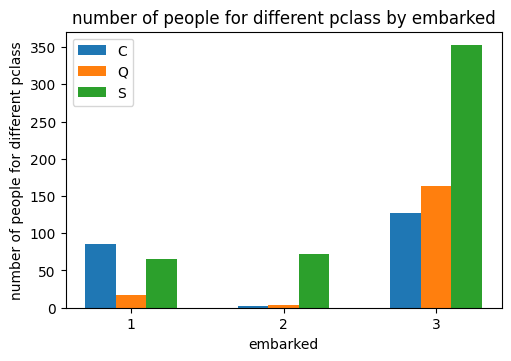

In [302]:
data1=data.copy(deep=True)
print(tem)
p1=np.array([0,0,0])
p2=np.array([0,0,0])
p3=np.array([0,0,0])

for x in data1.index :
    if data1.loc[x,'pclass'] == 1 and data.loc[x,'embarked'] == 'C' :
        p1[0]+=1
    if data1.loc[x,'pclass'] == 1 and data.loc[x,'embarked'] == 'Q' :
        p1[1]+=1
    if data1.loc[x,'pclass'] == 1 and data.loc[x,'embarked'] == 'S' :
        p1[2]+=1
    if data1.loc[x,'pclass'] == 2 and data.loc[x,'embarked'] == 'C' :
        p2[0]+=1
    if data1.loc[x,'pclass'] == 2 and data.loc[x,'embarked'] == 'Q' :
        p2[1]+=1
    if data1.loc[x,'pclass'] == 2 and data.loc[x,'embarked'] == 'S' :
        p2[2]+=1
    if data1.loc[x,'pclass'] == 3 and data.loc[x,'embarked'] == 'C' :
        p3[0]+=1
    if data1.loc[x,'pclass'] == 3 and data.loc[x,'embarked'] == 'Q' :
        p3[1]+=1
    if data1.loc[x,'pclass'] == 3 and data.loc[x,'embarked'] == 'S' :
        p3[2]+=1
    print(p1,p2,p3)
    
fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
bar1=axe.bar([1,2,3],p1,width=0.2)
bar2=axe.bar([1.2,2.2,3.2],p2,width=0.2)
bar3=axe.bar([1.4,2.4,3.4],p3,width=0.2)
axe.set_xticks([1.2,2.2,3.2],['1','2','3'])
axe.legend([bar1,bar2,bar3],['C','Q','S'])
axe.set_xlabel('embarked')
axe.set_ylabel('number of people for different pclass')
axe.set_title('number of people for different pclass by embarked')

Text(0, 0.5, 'Values of sibsp')

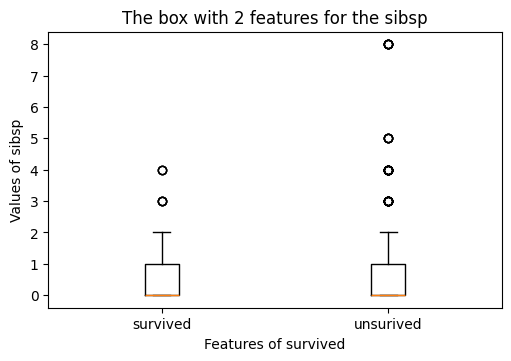

In [285]:
data1=data.copy(deep=True)
for x in data1.index :
    if data1.loc[x,'survived'] != 1 :
        data1.drop(x,inplace=True)
        
data2=data.copy(deep=True)
for x in data1.index :
    if data2.loc[x,'survived'] != 0 :
        data2.drop(x,inplace=True)

fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
axe.boxplot([data1['sibsp'],data2['sibsp']],labels=['survived','unsurived'])
axe.set_title('The box with 2 features for the sibsp')
axe.set_xlabel('Features of survived')
axe.set_ylabel('Values of sibsp')

Text(0, 0.5, 'Values of parch')

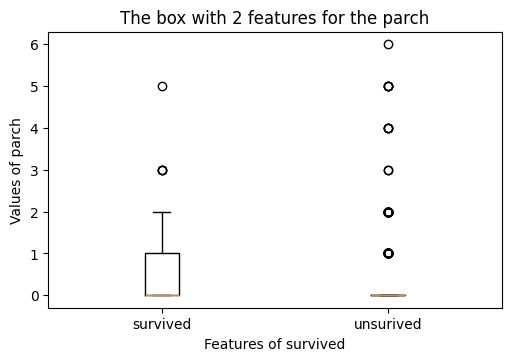

In [286]:
data1=data.copy(deep=True)
for x in data1.index :
    if data1.loc[x,'survived'] != 1 :
        data1.drop(x,inplace=True)
        
data2=data.copy(deep=True)
for x in data1.index :
    if data2.loc[x,'survived'] != 0 :
        data2.drop(x,inplace=True)

fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
axe.boxplot([data1['parch'],data2['parch']],labels=['survived','unsurived'])
axe.set_title('The box with 2 features for the parch')
axe.set_xlabel('Features of survived')
axe.set_ylabel('Values of parch')

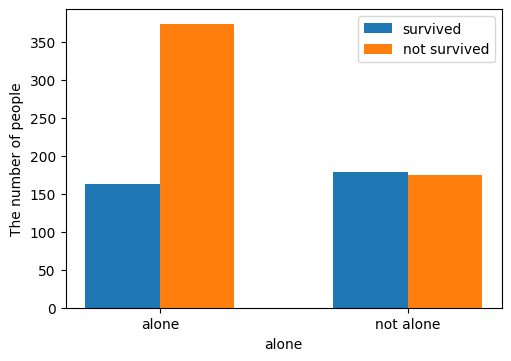

In [316]:
live=[0,0]
data1=data.copy(deep=True)
for x in data1.index :
    if data1.loc[x,'survived'] != 1 :
        data1.drop(x,inplace=True)
for x in data1.index :
     if data1.loc[x,'alone'] == 1 :
         live[0]+=1
     elif data1.loc[x,'alone'] == 0 :
         live[1]+=1
         
die=[0,0]        
data2=data.copy(deep=True)
for x in data1.index :
    if data2.loc[x,'survived'] != 0 :
        data2.drop(x,inplace=True)
for x in data2.index :
     if data2.loc[x,'alone'] == 1 :
         die[0]+=1
     elif data2.loc[x,'alone'] == 0 :
         die[1]+=1
fig,axe=plt.subplots(layout='constrained',figsize=[5,3.5])
bar1=axe.bar([1,2],live,width=0.3)
bar2=axe.bar([1.3,2.3],die,width=0.3)
axe.set_xlabel('alone')
axe.set_ylabel('The number of people')
axe.set_xticks([1.15,2.15],['alone','not alone'])
axe.legend([bar1,bar2],['survived','not survived'])
